In [2]:
%matplotlib inline
from imgcube.cube import imagecube
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('paper')

In [41]:
# Load up the data.
B6 = imagecube('../data/cont/TWHya.230GHz.fits', clip=1.4, kelvin='RJ')
B7 = imagecube('../data/cont/TWHya.345GHz.fits', clip=1.4, kelvin='RJ')
B6c = imagecube('../data/cont/TWHya.230GHz.circ.fits', clip=1.4, kelvin='RJ')
B7c = imagecube('../data/cont/TWHya.345GHz.circ.fits', clip=1.4, kelvin='RJ')

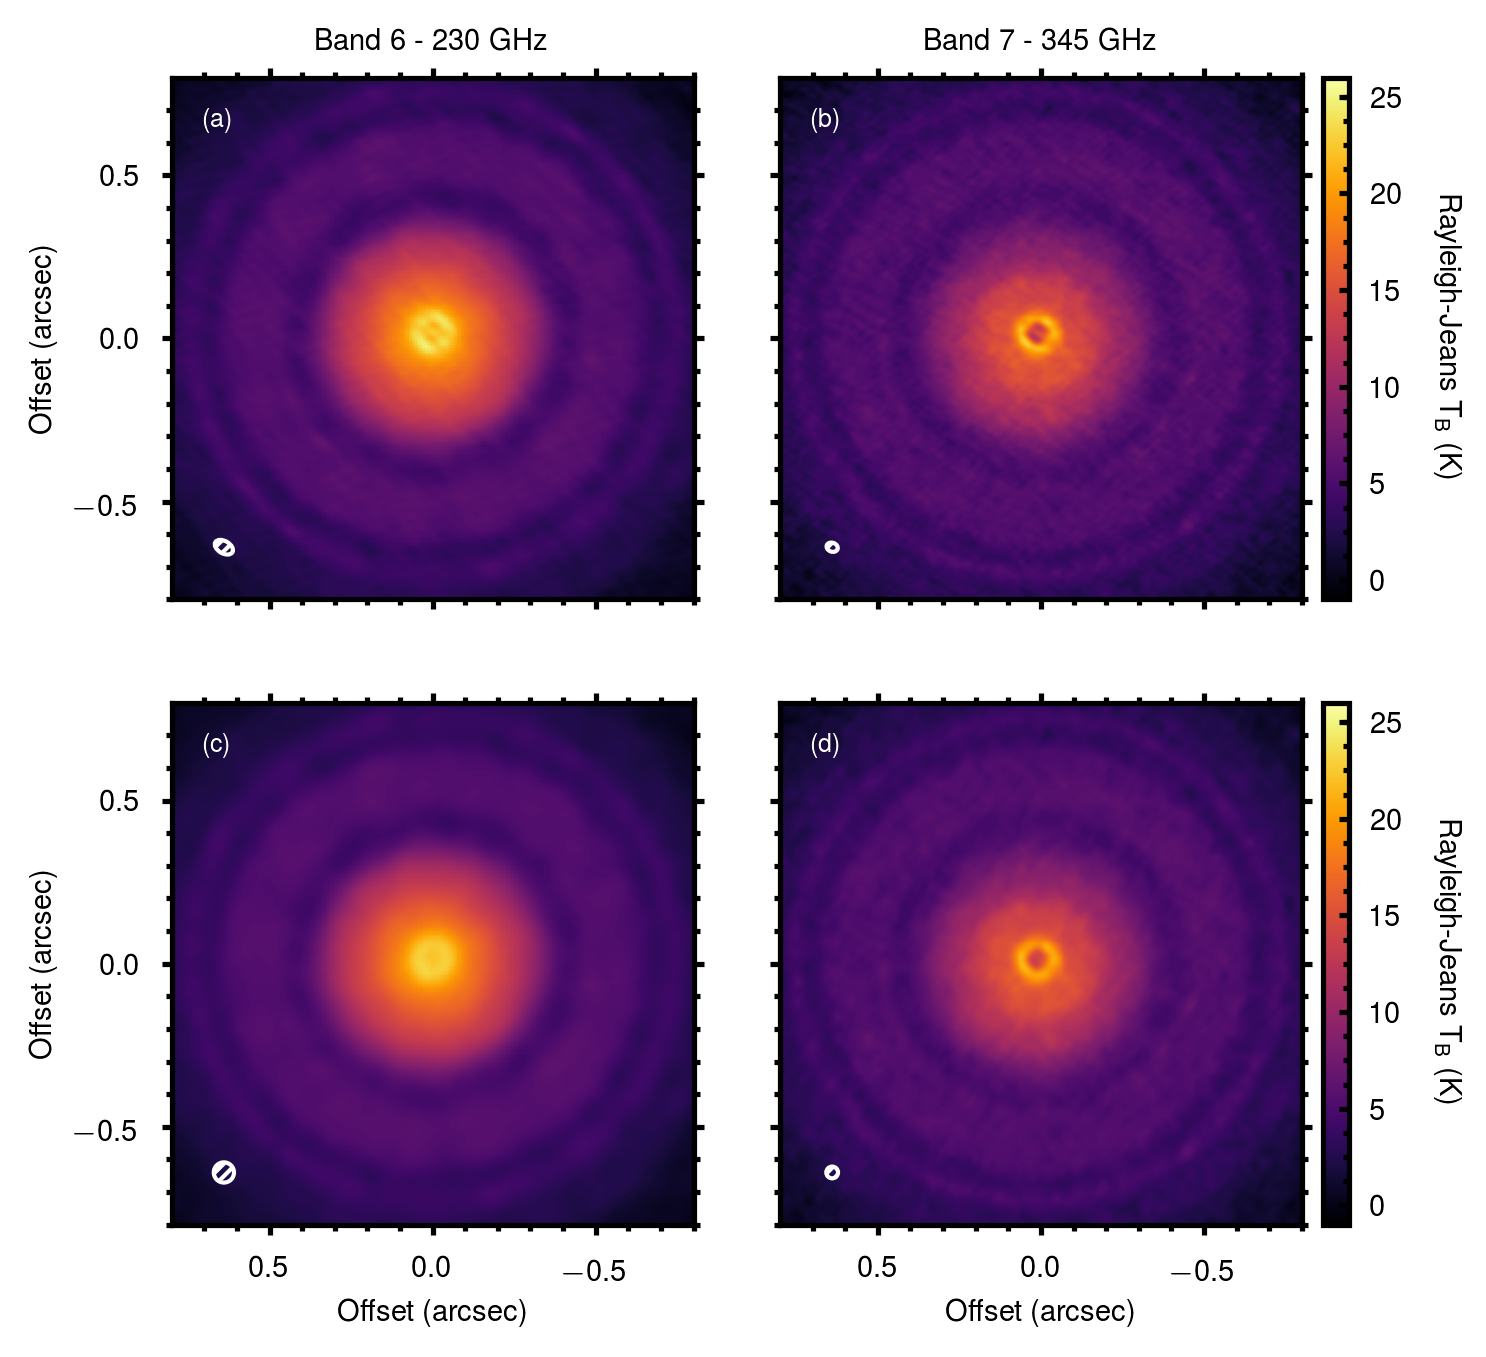

In [46]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(5, 4.5))
plt.subplots_adjust(wspace=0.0)

# Quadratic moment.
for ax, cube in zip(axs[0], [B6, B7]):
    
    im = ax.imshow(cube.data, extent=cube.extent, origin='lower', cmap='inferno', vmin=-1, vmax=26)
    cax = make_axes_locatable(ax).append_axes('right', size='5%', pad=0.07)
    
    # Make the colorbar.
    if ax == axs[0, -1]:
        cb = fig.colorbar(im, cax=cax, orientation='vertical', ticks=np.arange(0, 30, 5))
        cb.set_label(r'Rayleigh-Jeans T$_{\rm B}$ (K)', rotation=270, labelpad=13)
    else:
        cax.axis('off')

    ax.set_aspect(1)
    
    R = 0.8
    ax.set_xlim(R, -R)
    ax.set_ylim(-R, R)
    ax.tick_params(which='both', left=1, bottom=1, right=1, top=1, direction='out')
    ax.set_xticklabels([])
    cube.plotbeam(ax=ax, x0=0.1, y0=0.1, color='w')
    ax.xaxis.set_major_locator(MultipleLocator(0.5))
    ax.yaxis.set_major_locator(MultipleLocator(0.5))

for ax, cube in zip(axs[1], [B6c, B7c]):

    im = ax.imshow(cube.data, extent=cube.extent, origin='lower', cmap='inferno', vmin=-1, vmax=26)
    cax = make_axes_locatable(ax).append_axes('right', size='5%', pad=0.07)
    
    # Make the colorbar.
    if ax == axs[1, -1]:
        cb = fig.colorbar(im, cax=cax, orientation='vertical', ticks=np.arange(0, 30, 5))
        cb.set_label(r'Rayleigh-Jeans T$_{\rm B}$ (K)', rotation=270, labelpad=13)
    else:
        cax.axis('off')

    ax.set_aspect(1)
    
    R = 0.8
    ax.set_xlim(R, -R)
    ax.set_ylim(-R, R)
    ax.tick_params(which='both', left=1, bottom=1, right=1, top=1, direction='out')
    ax.set_xlabel('Offset (arcsec)')
    cube.plotbeam(ax=ax, x0=0.1, y0=0.1, color='w')
    ax.xaxis.set_major_locator(MultipleLocator(0.5))
    ax.yaxis.set_major_locator(MultipleLocator(0.5))
    
for i in range(2):
    axs[i, 1].set_yticklabels([])
    axs[i, 0].set_ylabel('Offset (arcsec)')
axs[0, 0].text(0.5, 1.04, 'Band 6 - 230 GHz', va='bottom', ha='center', fontsize=7, transform=axs[0, 0].transAxes)
axs[0, 1].text(0.5, 1.04, 'Band 7 - 345 GHz', va='bottom', ha='center', fontsize=7, transform=axs[0, 1].transAxes)
axs[0, 0].text(0.06, 0.94, '(a)', ha='left', va='top', transform=axs[0, 0].transAxes, fontsize=6, color='w')
axs[0, 1].text(0.06, 0.94, '(b)', ha='left', va='top', transform=axs[0, 1].transAxes, fontsize=6, color='w')
axs[1, 0].text(0.06, 0.94, '(c)', ha='left', va='top', transform=axs[1, 0].transAxes, fontsize=6, color='w')
axs[1, 1].text(0.06, 0.94, '(d)', ha='left', va='top', transform=axs[1, 1].transAxes, fontsize=6, color='w')

plt.tight_layout()
plt.savefig('continuum_maps.pdf', bbox_inches='tight')